## Scraping y análisis de texto en Python

In [ ]:
!pip install requests

In [ ]:
import requests

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
url = "https://www.argentina.gob.ar/noticias/nuevos-avances-en-gastroenterologia-infantil" #la URL de la página web a scrapear


In [ ]:
contenido = requests.get(url).text #Realizar la solicitud HTTP y obtener el contenido HTML de la página
print("contenido de la pagina obtenido con exito")

contenido de la pagina obtenido con exito


In [ ]:
##  o print(contenido)

In [ ]:
soup = BeautifulSoup(contenido, "html.parser") #Convertir el contenido en un objeto de BeautifulSoup para facilitar la extracción


In [ ]:
from collections import Counter

In [ ]:
parrafos = str(soup.find_all("p")) #Extraer todos los párrafos del sitio web

In [ ]:
print(parrafos)

[<p>Uno de los Equipos de Salud del Hospital fue reconocido por múltiples investigaciones publicadas en revistas internacionales.</p>, <p>Nos enorgullece compartir que el equipo de Gastroenterología Infantil ha llevado a cabo notables investigaciones con distintos Servicios del Hospital y otras instituciones de renombre.</p>, <p>Estos trabajos evidencian el abordaje interdisciplinario y la atención en salud de vanguardia que brinda nuestra institución, lo que nos permite seguir avanzando en el diagnóstico y tratamiento de niños con estas condiciones de salud.</p>, <p>Han participado profesionales de Cirugía Pediátrica, Hematoonco Infantil, Anatomía Patológica y Kinesiología, entre otros.</p>, <p>Entre los temas se destacan aspectos sobre enfermedad celíaca, cáncer colorrectal en pediatría, manometría anorrectal y el novedoso tratamiento de electroestimulación sacra transcutánea para pacientes con incontinencia fecal funcional o por mielomeningocele o malformaciones anorrectales.</p>, <

In [ ]:
print(parrafos.count("Equipos"))

1


In [ ]:
# Funcion para buscar palabras
def buscar_palabra(palabra):
  ocurrencias = str(soup).lower().count(palabra.lower())
  print(f"Encontraste la palabra '{palabra}' {ocurrencias} veces")

In [ ]:
buscar_palabra("Salud")

Encontraste la palabra 'Salud' 11 veces


In [ ]:
import random

In [ ]:
parrafo = soup.find_all("p")
parrafo_aleatorio = random.choice(parrafo).text.strip() #Selecciona un parrafo aleatorio

In [ ]:
print(parrafo_aleatorio)

Estos trabajos evidencian el abordaje interdisciplinario y la atención en salud de vanguardia que brinda nuestra institución, lo que nos permite seguir avanzando en el diagnóstico y tratamiento de niños con estas condiciones de salud.


In [ ]:
print(len(parrafo_aleatorio.split())) # cuenta la cantidad de palabras que tiene

35


In [ ]:
from wordcloud import WordCloud
import numpy as np
from PIL import Image
import nltk
from nltk.corpus import stopwords
import re

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Descarga corpus de stopwords en español para filtrar palabras innecesarias
nltk.download('stopwords')
stopwords_es = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
## Función para limpiar texto eliminando palabras comunes que no aportan significado

def limpiar_texto(texto):
  palabra_a_eliminar= ['dijo', 'así', 'aunque', 'sino', 'luego', 'pues', 'mientras',
        'después', 'antes', 'porque', 'cuando', 'cómo', 'donde', 'cap',
        'capítulo', 'verso', 'canto', 'á', 'ó','si','oh','allí','cuanto','cerca','parece','ay','p','quien','sido','dice','quién','dio','se','tan']

#Anexa las palabras que queremos eliminar a la lista de Stopwords
  black_list = stopwords_es.union(palabra_a_eliminar)
  texto_minuscula = texto.lower()
  texto_limpio = re.sub(r'[^\w\s]', '', texto_minuscula)
  palabras = texto_limpio.split()
  palabras_importantes =[]
  for palabra in palabras:
    if palabra not in black_list:
      palabras_importantes.append(palabra)
  return(palabras_importantes)

texto_completo = soup.get_text()
palabras_limpias = limpiar_texto(texto_completo)
texto_limpio = ' '.join(palabras_limpias)

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_limpio) # Generar y visualizar una nube de palabras con el contenido obtenido

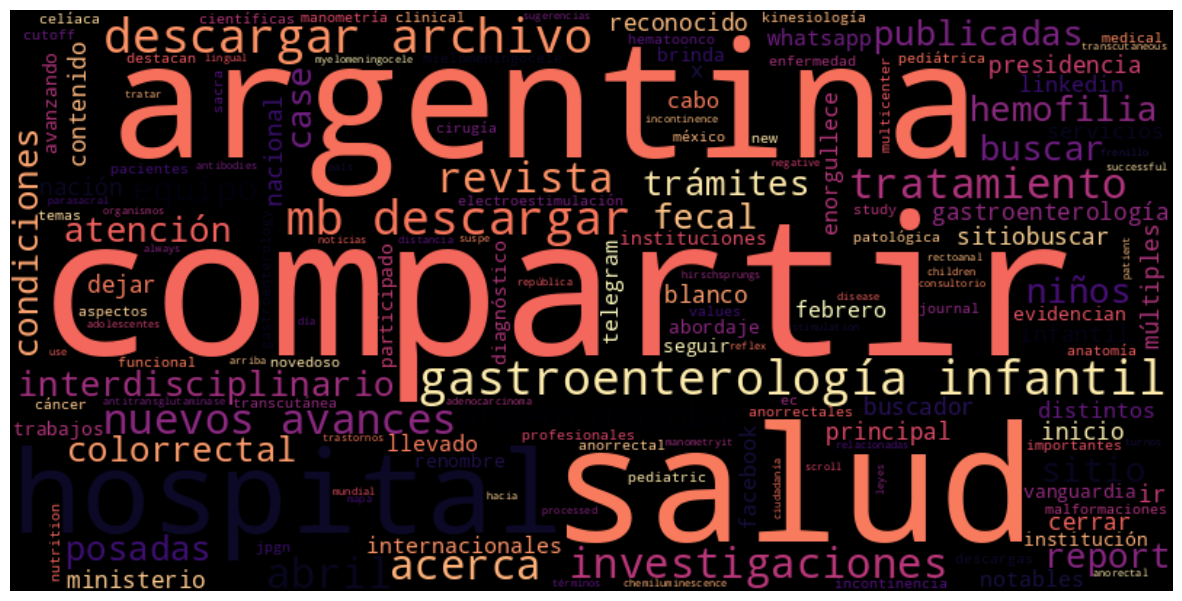

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color="black", colormap = "magma").generate(texto_limpio)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


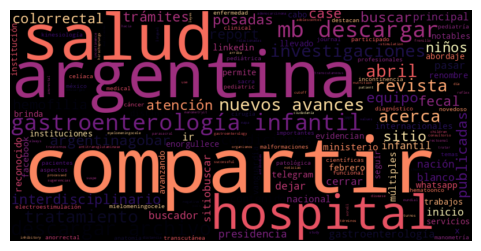

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color="black", colormap = "magma").generate(texto_limpio)
plt.figure(figsize=(7, 3))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Realizar scraping de una página distinta (Stack Overflow) para extraer pregunta y respuesta

In [ ]:
url_2 = "https://stackoverflow.com/questions/415511/how-to-get-the-current-time-in-python"

In [ ]:
# Obtener el contenido de la página
pagina = requests.get(url_2)
contenido = pagina.text

In [ ]:
soup = BeautifulSoup(contenido, "html.parser")

In [ ]:
texto_pregunta = pregunta.find("div", {"class": "s-prose js-post-body"})

In [ ]:
print(texto_pregunta.get_text().strip())


How do I get the current time in Python?


In [ ]:
respuesta = soup.find("div", {"class": "answer"})


In [ ]:
texto_respuesta = respuesta.find("div", {"class": "s-prose js-post-body"})


In [ ]:
print(texto_respuesta.get_text().strip())

Use datetime:
>>> import datetime
>>> now = datetime.datetime.now()
>>> now
datetime.datetime(2009, 1, 6, 15, 8, 24, 78915)
>>> print(now)
2009-01-06 15:08:24.789150

For just the clock time without the date:
>>> now.time()
datetime.time(15, 8, 24, 78915)
>>> print(now.time())
15:08:24.789150


To save typing, you can import the datetime object from the datetime module:
>>> from datetime import datetime

Then remove the prefix datetime. from all of the above.
